# Pymaceuticals Inc.
---

### Analysis

- In this study, 249 mice were tested in different time points. Mice were equally distributed by gender. Evaluations were preformed for each mouse up to 10 times. Two variables asociated with the progression of the disease were assessed: Tumor volume and metastatic sites. Additionaly the age, the weight, sex and treatment received were registred. It was observed that there is a positive correlation with the tumour size and the weight of the mouse. Regarding to the treatment effectiveness, Capomulin and Ramicane were the most effective drugs in reducing the size of the tumour. Other drugs resulted in quite similar results as Placebo.
 

In [38]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import scipy.stats as linregress
import seaborn as sns
from scipy.stats import pearsonr


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [39]:
df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID', how = 'left')

In [40]:
df.Timepoint.unique()

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45], dtype=int64)

In [41]:
# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata,study_results, on = 'Mouse ID', how = 'left')
# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [42]:
# Checking the number of mice.
df['Mouse ID'].nunique()

249

In [43]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
df['Mouse ID_'] = df['Mouse ID'] + '-' + df['Timepoint'].astype(str)

In [44]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = df[df.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
df[df['Mouse ID'] == 'g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID_
908,g989,Propriva,Female,21,26,0,45.000000,0,g989-0
909,g989,Propriva,Female,21,26,0,45.000000,0,g989-0
910,g989,Propriva,Female,21,26,5,48.786801,0,g989-5
911,g989,Propriva,Female,21,26,5,47.570392,0,g989-5
912,g989,Propriva,Female,21,26,10,51.745156,0,g989-10
913,g989,Propriva,Female,21,26,10,49.880528,0,g989-10
914,g989,Propriva,Female,21,26,15,51.325852,1,g989-15
915,g989,Propriva,Female,21,26,15,53.442020,0,g989-15
916,g989,Propriva,Female,21,26,20,55.326122,1,g989-20
917,g989,Propriva,Female,21,26,20,54.657650,1,g989-20


In [45]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
df = df[~df.duplicated(subset='Mouse ID_', keep=False)]


In [46]:
# Checking the number of mice in the clean DataFrame.
df['Mouse ID'].nunique()

249

In [47]:
#Check if 'g989' is in df
# Answer is true as only duplicate rows where removed not all the data from that mouse.
'g989' in df['Mouse ID'].values

True

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
df_per_drug_mean = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
df_per_drug_median = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
df_per_drug_var = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
df_per_drug_std = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
df_per_drug_sem = df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
merge = pd.merge(df_per_drug_mean,df_per_drug_median, on='Drug Regimen').reset_index()
merge = merge.rename(columns={'Tumor Volume (mm3)_x': 'Mean Tumor Volume',
                              'Tumor Volume (mm3)_y': 'Median Tumor Volume'
                             }
                    )
merge = pd.merge(merge,df_per_drug_var, on='Drug Regimen')
merge = pd.merge(merge,df_per_drug_std, on='Drug Regimen')
merge = merge.rename(columns={'Tumor Volume (mm3)_x': 'Var Tumor Volume',
                              'Tumor Volume (mm3)_y': 'Std Tumor Volume'
                             }
                    )
merge = pd.merge(merge,df_per_drug_sem, on='Drug Regimen').reset_index()
merge = merge.rename(columns={'Tumor Volume (mm3)': 'Sem Tumor Volume',
                             }
                    )

In [49]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.458254,50.854632,44.053659,6.637293,0.540135
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [50]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.


<AxesSubplot:xlabel='Drug Regimen'>

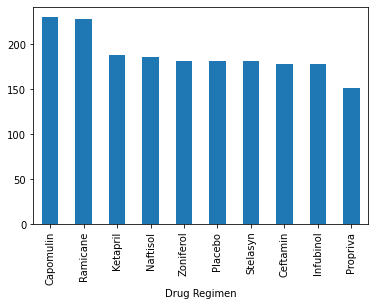

In [51]:
df.groupby('Drug Regimen')['Mouse ID_'].count().sort_values(ascending=False).plot(kind='bar')


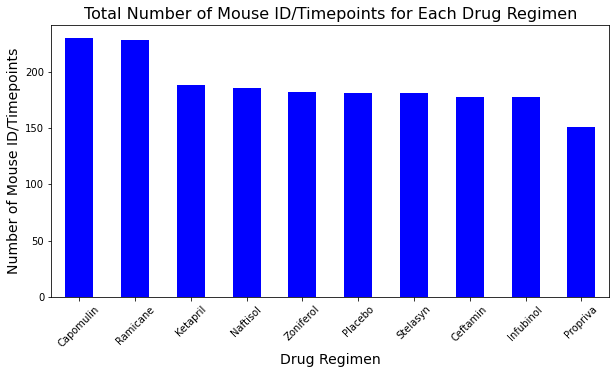

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = df.groupby('Drug Regimen')['Mouse ID_'].count().sort_values(ascending=False)
drug_counts.plot(kind='bar', figsize=(10,5), color='blue')
plt.title('Total Number of Mouse ID/Timepoints for Each Drug Regimen', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Number of Mouse ID/Timepoints', fontsize=14)
plt.xticks(rotation=45)

plt.show()

<AxesSubplot:ylabel='Mouse ID'>

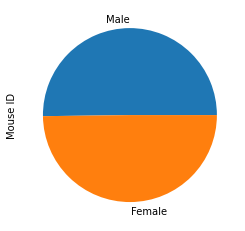

In [53]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
df[['Mouse ID','Sex']].drop_duplicates().groupby('Sex')['Mouse ID'].count().sort_values(ascending=False).plot(kind='pie')




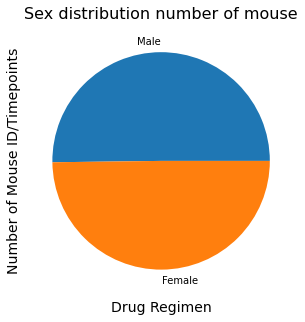

In [54]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Sex_distribution = df[['Mouse ID','Sex']].drop_duplicates().groupby('Sex')['Mouse ID'].count().sort_values(ascending=False)
Sex_distribution.plot(kind='pie', figsize=(10,5))
plt.title('Sex distribution number of mouse', fontsize=16)
plt.xlabel('Drug Regimen', fontsize=14)
plt.ylabel('Number of Mouse ID/Timepoints', fontsize=14)
plt.xticks(rotation=45)

plt.show()

## Quartiles, Outliers and Boxplots

In [55]:
# Start by getting the last (greatest) timepoint for each mouse
Tumor_size_last_treatment = df.loc[df.groupby('Mouse ID')['Timepoint'].idxmax()]
# Start by getting the last (greatest) timepoint for each mouse
Tumor_size_first_treatment = df.loc[df.groupby('Mouse ID')['Timepoint'].idxmin()]

In [56]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Tumor_volume_per_mouse_last_treatment = Tumor_size_last_treatment.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
Tumor_volume_per_mouse_first_treatment = Tumor_size_first_treatment.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

In [57]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df = pd.merge(df,Tumor_volume_per_mouse_last_treatment, on = 'Mouse ID')
df = df.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Volume (mm3)',
                              'Tumor Volume (mm3)_y': 'Tumor Volume (mm3)_last'
                             }
              )

In [58]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
df = pd.merge(df,Tumor_volume_per_mouse_first_treatment, on = 'Mouse ID')
df = df.rename(columns={'Tumor Volume (mm3)_x': 'Tumor Volume (mm3)',
                              'Tumor Volume (mm3)_y': 'Tumor Volume (mm3)_first'
                             }
              )

In [59]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
df_subset_4_treatments = df[df['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

Mean_tumour_size_after_treatment_subsetting_4_drugs = df_subset_4_treatments.groupby('Drug Regimen')['Tumor Volume (mm3)_last'].mean().reset_index()
Mean_tumour_size_after_treatment_subsetting_4_drugs

,Drug Regimen,Tumor Volume (mm3)_last
0,Capomulin,36.426321
1,Ceftamin,61.658900
2,Infubinol,61.315325
3,Ramicane,35.609686


In [60]:
# Put treatments into a list for for loop (and later for plot labels)
def count_outliers(drug_regimen):
    q1 = df_subset_4_treatments[df_subset_4_treatments['Drug Regimen'] == drug_regimen]['Tumor Volume (mm3)_last'].quantile(0.25)
    q3 = df_subset_4_treatments[df_subset_4_treatments['Drug Regimen'] == drug_regimen]['Tumor Volume (mm3)_last'].quantile(0.75)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    iqr = q3 - q1
# Determine outliers using upper and lower bounds
    upper_bound = q3 + 1.5 * iqr
    lower_bound = q1 - 1.5 * iqr
# Locate the rows which contain mice on each drug and get the tumor volumes
    outliers = df_subset_4_treatments[(df_subset_4_treatments['Drug Regimen'] == drug_regimen) & ((df_subset_4_treatments['Tumor Volume (mm3)'] < lower_bound) | (df_subset_4_treatments['Tumor Volume (mm3)'] > upper_bound))]
    return outliers['Mouse ID'].nunique()

# Create empty list to fill with tumor vol data (for plotting)
outlier_counts = {}

# Loop through each drug regimen and count the outliers
for drug in ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']:
    outlier_counts[drug] = count_outliers(drug)
    
# Print the outlier counts
print(outlier_counts)


{'Capomulin': 0, 'Ramicane': 0, 'Infubinol': 1, 'Ceftamin': 25}


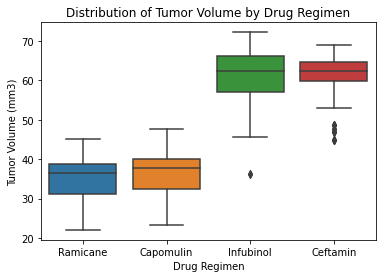

In [61]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
sns.boxplot(data=df_subset_4_treatments, x='Drug Regimen', y='Tumor Volume (mm3)_last')

# Set the axis labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume by Drug Regimen')
plt.savefig('boxplot.png', dpi = 300)
plt.show()

## Line and Scatter Plots

<AxesSubplot:xlabel='Timepoint'>

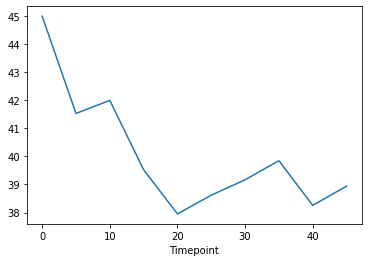

In [62]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin = df[df['Drug Regimen'] == 'Capomulin']
Capomulin_b742 = Capomulin[Capomulin['Mouse ID'] == 'b742']
Capomulin_b742.groupby('Timepoint')['Tumor Volume (mm3)'].mean().plot(kind = 'line')

## Correlation and Regression

In [63]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation coefficient between weight and tumor volume for the Capomulin regimen is 0.84.


<ipython-input-64-ec137079057f>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  capomulin_mean_df = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].mean()


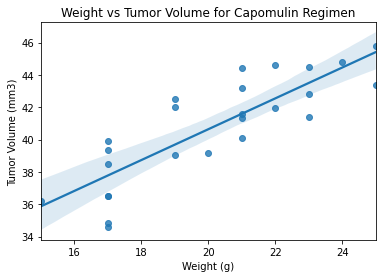

In [64]:


# Calculate the average tumor volume for each mouse on the Capomulin regimen
capomulin_mean_df = Capomulin.groupby('Mouse ID')['Tumor Volume (mm3)', 'Weight (g)'].mean()

# Calculate the correlation coefficient between weight and tumor volume
corr_coefficient, p_value = pearsonr(capomulin_mean_df['Weight (g)'], capomulin_mean_df['Tumor Volume (mm3)'])
print(f"The correlation coefficient between weight and tumor volume for the Capomulin regimen is {corr_coefficient:.2f}.")

# Plot a scatterplot of weight vs tumor volume with a regression line
sns.regplot(x='Weight (g)', y='Tumor Volume (mm3)', data=capomulin_mean_df)
plt.title('Weight vs Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [65]:
df_new = df.drop_duplicates(subset=['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Metastatic Sites', 'Tumor Volume (mm3)_last', 'Tumor Volume (mm3)_first'])


df_new_melt = pd.melt(df_new, id_vars=['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)', 'Timepoint', 'Metastatic Sites'], 
                  value_vars=['Tumor Volume (mm3)_last', 'Tumor Volume (mm3)_first'],
                  var_name='Attribute', value_name='Value')


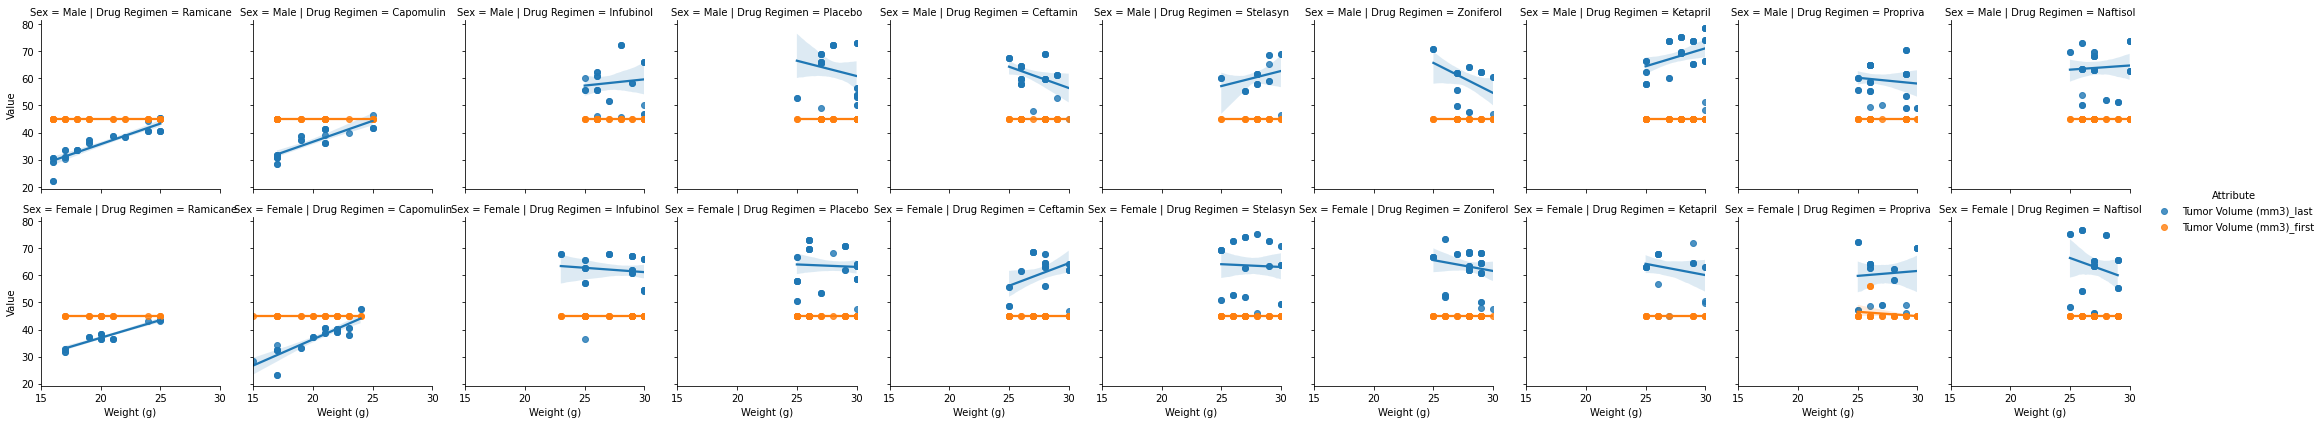

In [66]:
import seaborn as sns

# Filter the dataframe to include only the relevant drug regimens
#df_filtered_2 = df_new_melt[df_new_melt['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Create the FacetGrid with x = Weight, y = Tumor Volume After Treatment, and hue = Sex
g = sns.FacetGrid(df_new_melt, col='Drug Regimen', row='Sex', hue='Attribute')

# Plot the scatterplot and regression line for Tumor Volume After Treatment
g.map(sns.regplot, 'Weight (g)', 'Value')

# Add a legend for the sex variable
g.add_legend()

# Show the plot
plt.show()

In [67]:
# Define the bin edges for age categories
bin_edges = [0, 6, 12, 18, 24]

# Define the bin labels for age categories
bin_labels = ['<1 yr', '1-2 yrs ', '2-3 yrs', '4-5 yrs']

# Use pd.cut() to create a new column "Age_Category"
df_new_melt['Age_months'] = pd.cut(df_new_melt['Age_months'], bins=bin_edges, labels=bin_labels)


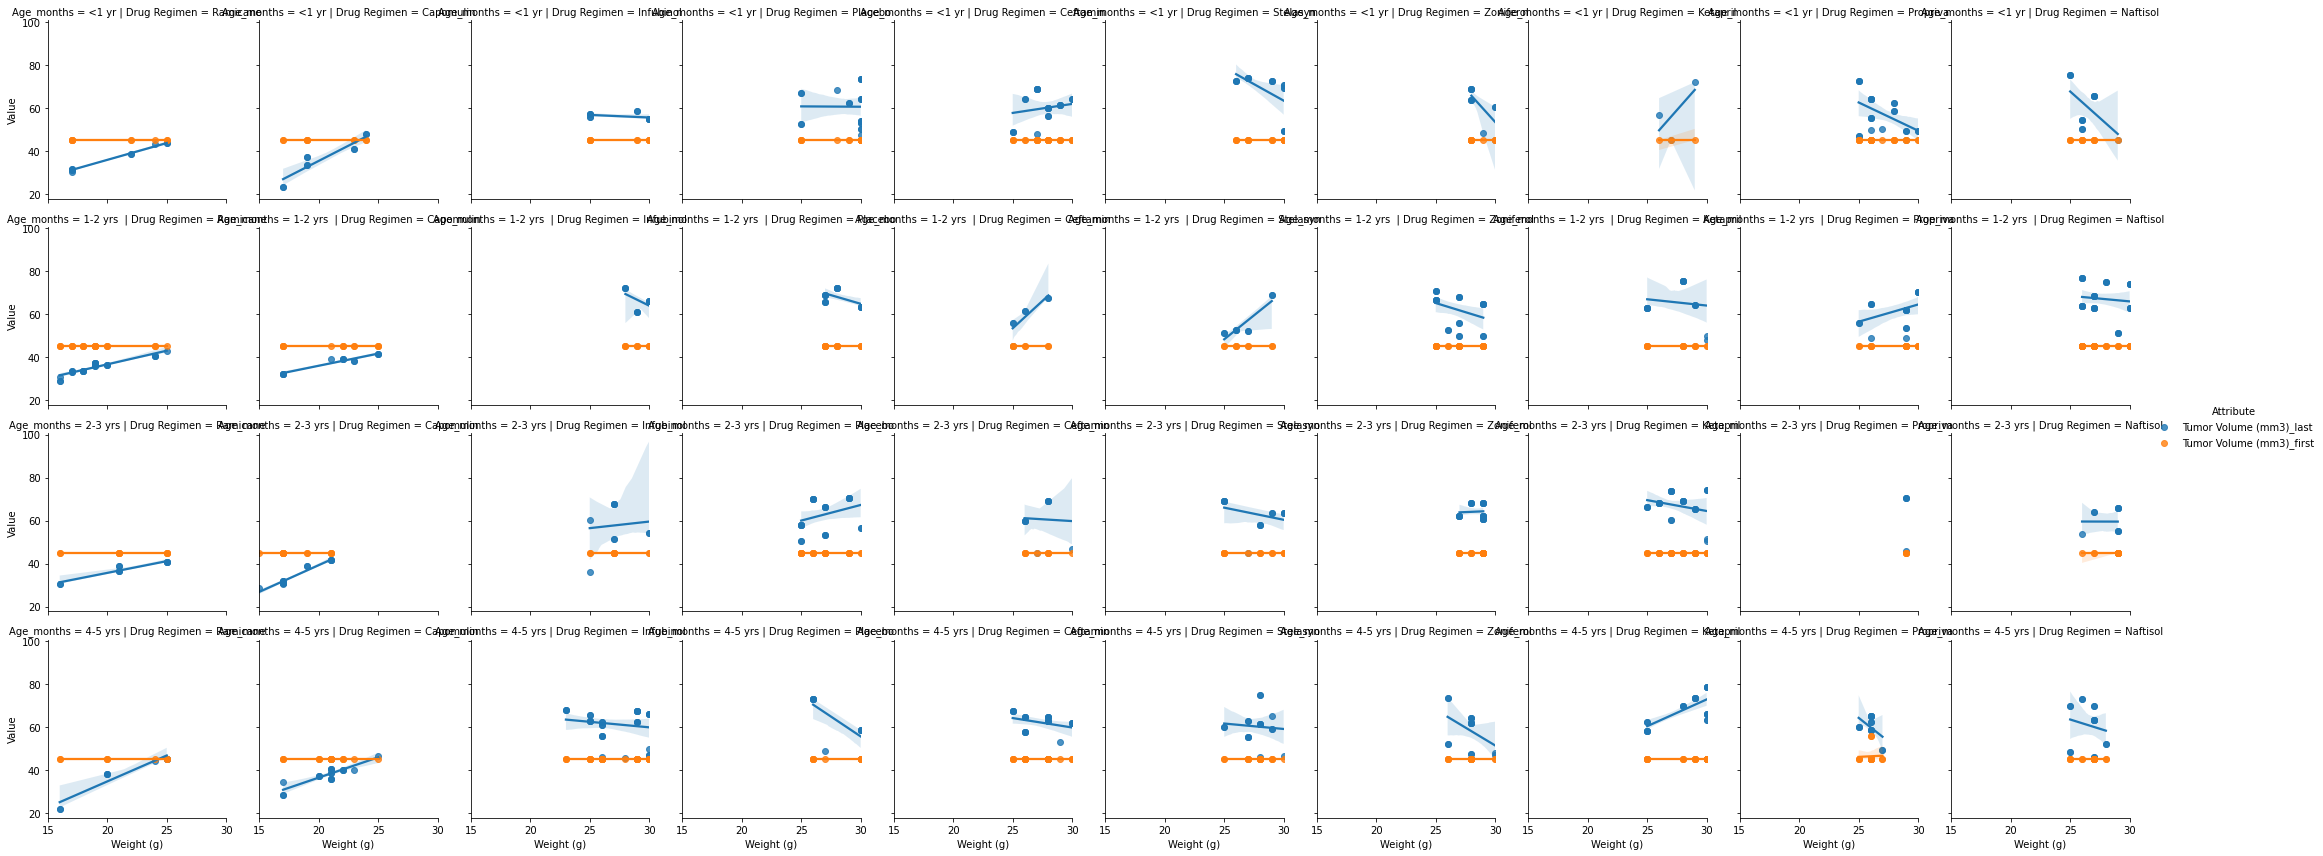

In [68]:

# Filter the dataframe to include only the relevant drug regimens
#df_filtered_2 = df_new_melt[df_new_melt['Drug Regimen'].isin(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])]

# Create the FacetGrid with x = Weight, y = Tumor Volume After Treatment, and hue = Sex
g = sns.FacetGrid(df_new_melt, col='Drug Regimen', row='Age_months', hue='Attribute')

# Plot the scatterplot and regression line for Tumor Volume After Treatment
g.map(sns.regplot, 'Weight (g)', 'Value')

# Add a legend for the sex variable
g.add_legend()

# Show the plot
plt.show()